In [1]:
# !mkdir -p ~/aiffel/camera_sticker/models
# !mkdir -p ~/aiffel/camera_sticker/images
# !ln -s ~/data/* ~/aiffel/camera_sticker/images
# !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# !mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models
# !cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

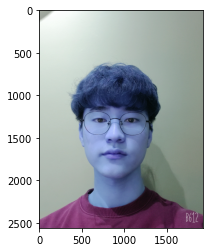

In [3]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/KakaoTalk_Photo_2022-05-25-00-02-02.jpeg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

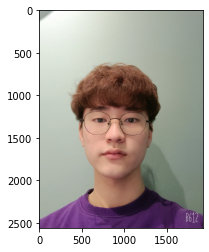

In [4]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [5]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
detector_hog

In [6]:
#이미지 upsampling 방법으로 크기를 키우는 것을 이미지 피라미드
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
dlib_rects #rectangle[[시작지점,종료지점]]

rectangles[[(404, 1043) (1362, 2002)]]

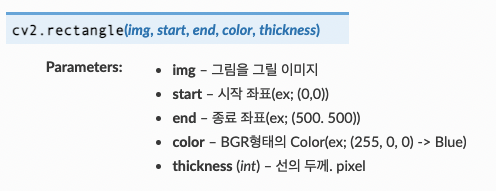

rectangles[[(404, 1043) (1362, 2002)]]


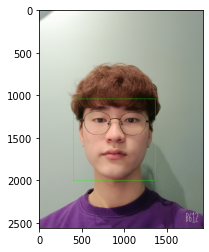

In [7]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## face landmark localization

In [8]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [9]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


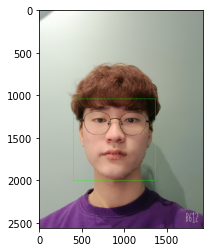

In [17]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 고양이 수염 그리기

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[2][0]
    y = landmark[36][1]
    w = (landmark[30][0] - x)*2 
    h = landmark[48][1] - y
    print(dlib_rect)
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

[(404, 1043) (1362, 2002)]
(x,y) : (509,1293)
(w,h) : (784,407)


In [12]:
#고양이 스티커 불러오기
cat_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' 
cat_sticker = cv2.imread(cat_path)
cat_sticker = cv2.resize(cat_sticker, (w,h))
print (cat_sticker.shape)

(407, 784, 3)


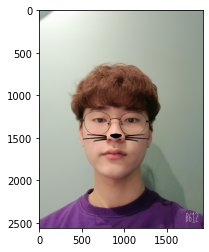

In [14]:
cat_area = img_bgr[y:y+cat_sticker.shape[0],x:x+cat_sticker.shape[1]]
img_bgr[y:y+cat_sticker.shape[0],x:x+cat_sticker.shape[1]] = \
    np.where(cat_sticker==255,cat_area,cat_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 회고록
다른 프로젝트에 시간을 쏟느라... 3번은 트라이 해보지 못했습니다.
landmark localization 덕분에 편하게 진행할수있었고, 좌표계산은 이전에 노드 진행하셨던 수강생분들의 깃허브를 참고하였습니다.